In [58]:
import pandas as pd

In [59]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
#split dataset

X=df.loc[:, df.columns != 'Outcome'] #features
y=df['Outcome'] #target

In [61]:
#split train and test data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=2)

In [62]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=7,
min_samples_split=2,min_samples_leaf=1,random_state=9) #max depth None,5

"""
model=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
"""

model.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, random_state=9)

In [63]:
print('Feature Importances: ',model.feature_importances_)

Feature Importances:  [0.09009848 0.30222156 0.07213189 0.06499392 0.06312201 0.16364951
 0.11813213 0.12565051]


Text(0, 0.5, 'Mean decrease in impurity')

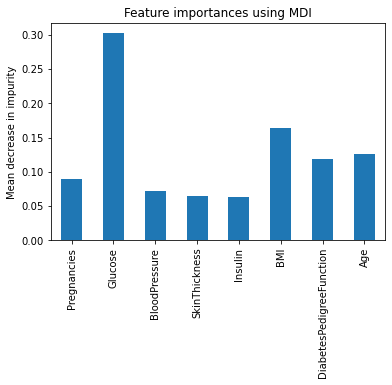

In [76]:
#plotting feature importance

importances=model.feature_importances_
feature_names = X.columns.to_list()

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [64]:
#perfromance test on train data

from sklearn.metrics import classification_report,confusion_matrix

y_train_pred=model.predict(X_train)

print(classification_report(y_train,y_train_pred))
print('--------------------------------------------------')
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       345
           1       0.98      0.84      0.91       192

    accuracy                           0.94       537
   macro avg       0.95      0.92      0.93       537
weighted avg       0.94      0.94      0.94       537

--------------------------------------------------
[[342   3]
 [ 30 162]]


In [65]:
#on test data
y_pred=model.predict(X_test)

print(classification_report(y_test,y_pred))
print('--------------------------------------------------')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       155
           1       0.67      0.51      0.58        76

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231

--------------------------------------------------
[[136  19]
 [ 37  39]]
